## Development of an algorithm for data protection

ou need to protect the data of customers of the insurance company "Though the Flood". Develop a data transformation method that makes it difficult to recover personal information from it. Justify the correctness of its work.

You need to protect the data so that the quality of the machine learning models does not deteriorate during the transformation.

**Data**

- *Пол* - Gender
- *Возраст* - Age
- *Зарплата* - Salary
- *Члены семьи* - Family members
- *Страховые выплаты* - Insurance payments

## 1. Data Upload

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
insurance = pd.read_csv('/datasets/insurance.csv')

In [4]:
insurance.info()
display(insurance.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
insurance['Возраст'] = insurance['Возраст'].astype('int')
insurance['Зарплата'] = insurance['Зарплата'].astype('int')

In [6]:
print(insurance.duplicated().sum())
insurance = insurance.drop_duplicates().reset_index(drop=True)
insurance.info()

153
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
Пол                  4847 non-null int64
Возраст              4847 non-null int64
Зарплата             4847 non-null int64
Члены семьи          4847 non-null int64
Страховые выплаты    4847 non-null int64
dtypes: int64(5)
memory usage: 189.5 KB


Two columns are converted to integer type. Duplicate data found and removed.

count    4847.000000
mean       31.023932
std         8.487995
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: Возраст, dtype: float64


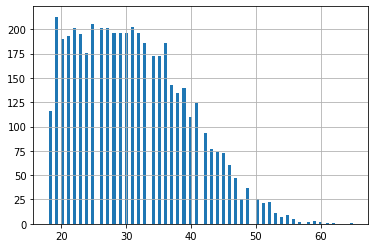

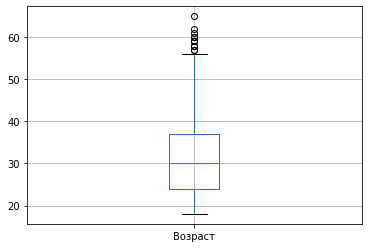

count     4847.000000
mean     39895.811223
std       9972.952441
min       5300.000000
25%      33200.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: Зарплата, dtype: float64


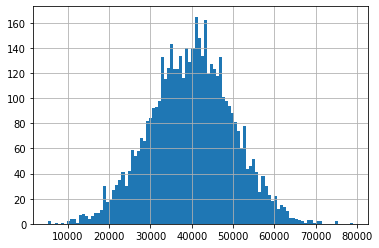

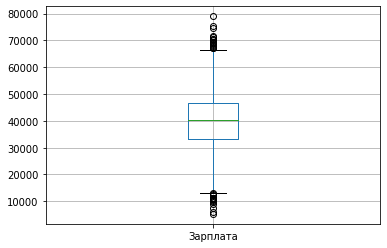

count    4847.000000
mean        1.203425
std         1.098664
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: Члены семьи, dtype: float64


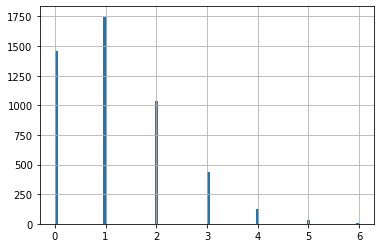

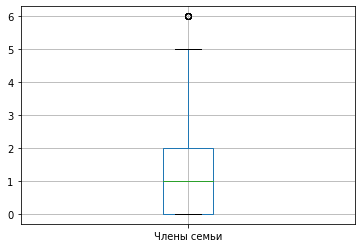

count    4847.000000
mean        0.152259
std         0.468934
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: Страховые выплаты, dtype: float64


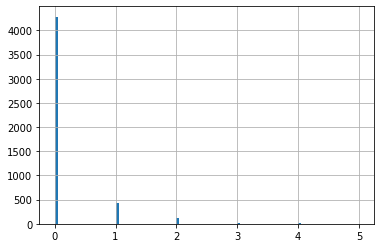

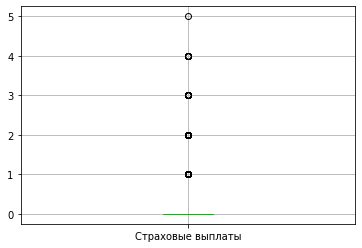

In [7]:
ins_columns = ('Возраст','Зарплата','Члены семьи','Страховые выплаты')

for i in ins_columns:
   
    print(insurance[i].describe())
    insurance[i].hist(bins=100)
    plt.show()
    insurance.boxplot(column=i)
    plt.show()

The average age of clients is 31 years. Salaries are distributed normally. The average for insurance payments is close to zero, which is good. But there is also with 5 payments for 5 years (hard life).

## 2. Matrix multiplication

Designations:

- $X$ — feature matrix (zero column consists of ones)

- $y$ — target feature vector

- $P$ — the matrix by which the features are multiplied

- $w$ — vector of linear regression weights (zero element equals shift)

Answer the question and justify your decision.

The features are multiplied by an invertible matrix. Will the quality of linear regression change? (It can be retrained.)

a. Will change. Give examples of matrices.

b. Will not change. Specify how the linear regression parameters are related in the original problem and in the transformed one.

Predictions:

$$
a = Xw
$$

Training task:

$$
w = \arg\min_w MSE(Xw, y)
$$

Training formula:

$$
w = (X^T X)^{-1} X^T y
$$

**Answer:** The quality of the linear regression should not change.

**Rationale:** let $ a = Xw, a' = X'w'$, where X' features multiplied by an invertible matrix. $ X' = XP $
$$ w = (X^T X) ^ {-1}  X^T y $$
$$ w' = ((XP)^T XP)^{-1} (XP)^T y $$
Matrix Properties: $ (A^T)^{-1} = (A^{-1})^T ; (AB)^T = B^TA^T ; AA^{-1} = E ; AE = EA = A; (AB)^{-1} = B^{-1}A^{-1}$

$ a'= XP((XP)^T XP)^{-1} (XP)^T y = XP(P^T X^T XP)^{-1}P^T X^T y = XP(XP)^{-1}(P^TX^T)^{-1}P^T X^T y
= XPP^{-1}X^{-1}(X^T)^{-1}(P^T)^{-1}P^T X^T y = XEX^{-1}(X^T)^{-1}EX^T y = X (X^TX)^{-1} X^T y = Xw = a $

Proved that $ a' = X'w' = Xw = a$
Therefore, the quality will not change.


## 3. Conversion algorithm

**Algorithm**

To transform the data, let's create a reversible matrix of the size of our original insurance matrix, then multiply the insurance matrix by the reversible matrix. The matrix obtained during the transformation will give the same result.

**Rationale**

In task 2, we proved that such a feature-homing will not affect linear regression, since $a' = X'w' = Xw = a$, where X' features multiplied by an invertible matrix. $ X' = XP $

For linear regression, we have the equation $a = Xw + w0$, obtained to change the result of linear regression, you need to change either the weight vector or the shift

## 4. Algorithm verification

In [9]:
insurance_ohe = pd.get_dummies(insurance, drop_first=True)

target_insurance = insurance_ohe['Страховые выплаты']
features_insurance = insurance_ohe.drop('Страховые выплаты', axis=1)
print(features_insurance.shape)

(4847, 4)


In [12]:
#create an invertible matrix and check it for invertibility
transformation_matrix = np.random.randn(4,4)
print(transformation_matrix)
transformation_matrix_inv = np.linalg.inv(transformation_matrix)
print(transformation_matrix_inv)

[[-0.14612546 -0.55403043 -0.09673651 -2.26787467]
 [-1.54397412  0.13835044 -0.83263315 -0.27937987]
 [ 1.09828879  1.86345813  2.05711175  0.68967423]
 [-0.34951706  0.13112547 -0.30517375  0.35843297]]
[[ 1.16121618 -1.96532583  0.09478276  5.63299483]
 [ 1.43008777 -1.30031525  0.5701684   6.93783132]
 [-1.64896949  2.10838644 -0.03270101 -8.72704981]
 [-0.79478812  0.35435839 -0.14400154 -1.68557344]]


In [13]:
#transform features through matrix multiplication
features_insurance_transfromed = features_insurance @ transformation_matrix_inv 

In [14]:
features_train_tr, features_test_tr, target_train, target_test, features_train, features_test = \
    train_test_split(features_insurance_transfromed, target_insurance, features_insurance, 
                     test_size=0.25, random_state=12345)
print(features_train_tr.shape, features_test_tr.shape, target_train.shape, target_test.shape, 
      features_train.shape,features_test.shape)

(3635, 4) (1212, 4) (3635,) (1212,) (3635, 4) (1212, 4)


In [15]:
display(features_train_tr.head(5)) # with transformation
display(features_train.head(5)) # and without it

,0,1,2,3
4460,-89830.384250,114871.360907,-1766.528401,-475433.326773
3773,-83548.043311,106844.169596,-1636.324090,-442193.840595
4561,-46137.618364,59003.967132,-902.088275,-244192.572434
1385,-63912.802034,81744.279082,-1242.001322,-338283.454740
724,-53535.099658,68470.901071,-1040.120131,-283353.291300


,Пол,Возраст,Зарплата,Члены семьи
4460,0,28,54500,2
3773,1,38,50700,1
4561,0,24,28000,1
1385,0,47,38800,0
724,0,40,32500,1


In [16]:
model = LinearRegression()
model_trans = LinearRegression()

In [17]:
model.fit(features_train, target_train)
model_trans.fit(features_train_tr, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
pred = model.predict(features_test)
pred_trans = model_trans.predict(features_test_tr)

In [19]:
r2 = r2_score(target_test, pred)
r2_trans = r2_score(target_test, pred_trans)
print('r2 value without feature transformation:', r2)
print('The value of r2 multiplied by an invertible matrix:', r2_trans)

Значение r2 без преобразования признаков: 0.4230772761583642
Значение r2 с домножением на обратимую матрицу: 0.4230772761580791


**Results**

As a result of feature augmentation on an invertible matrix, it was proved that linear regression, in particular the metric r2, will not change